#### 1. Load text
Loading a txt file or a json file

In [12]:
import json
with open('../wordbank/encourage.json', 'r') as fp:
    data = json.load(fp)
words = data['countries']
words[0]

'Afghanistan'

In [5]:
# file = open('../wordbank/alice_in_worderland_wordlist.txt','r')
# words = file.read().lower().split('\n')
# print(len(words)) #check the length of the list
# print(words[0]) #check the first word of the list

#### 2. Plural check
this will check if the word has a plural version in the list
if there is, we will remove the plural vocab and keep the singular one

In [13]:
for word in words:
    if word + "s" in words:
        plural_v = word + "s" 
        print (plural_v)
        words.remove(plural_v)
len(words)

197

#### 3. Import spaCy and create w2v function
we will load the medium package which will have good w2v function

we will also create a new dictionary that stores all vector data of all words

In [14]:
import spacy
nlp = spacy.load("en_core_web_md")

def vec(s):
    return nlp.vocab[s].vector

In [15]:
model = {}
for word in words:
    word_vec = vec(word)
    model[word] = word_vec

#### 4. use t-SNE model, clean overlapping words and plot our w2v
flatten and showcases the data

In [16]:
from sklearn.manifold import TSNE

In [17]:
import matplotlib.pyplot as plt
labels = []
tokens = []
reset_dict = {}
def tsne_plot(model): 

    for word in model:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    
    #clean duplicates and append to a new dictionary
    #grabbing the coordinates
    coordinates = {}
    for i in range(len(labels)):
        coordinates[labels[i]] = new_values[i].tolist()
        
    #creating a new dictionary
    #only appends the coordinate that doesn't have duplicated values in the original dict
    for key in coordinates:
        name = key
        if coordinates[key] not in reset_dict.values():
            reset_dict[name] = [coordinates[key][0]*25, coordinates[key][1]*25]
   
    #append back the coordinate for plot
    coordinate_new = []
    for v in reset_dict.values():
        coordinate_new.append(v)
    #append back the labels for plot
    label_new = []
    for key in reset_dict:
        label_new.append(key)
    
    #scale the x and y 
    for value in coordinate_new:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(label_new[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

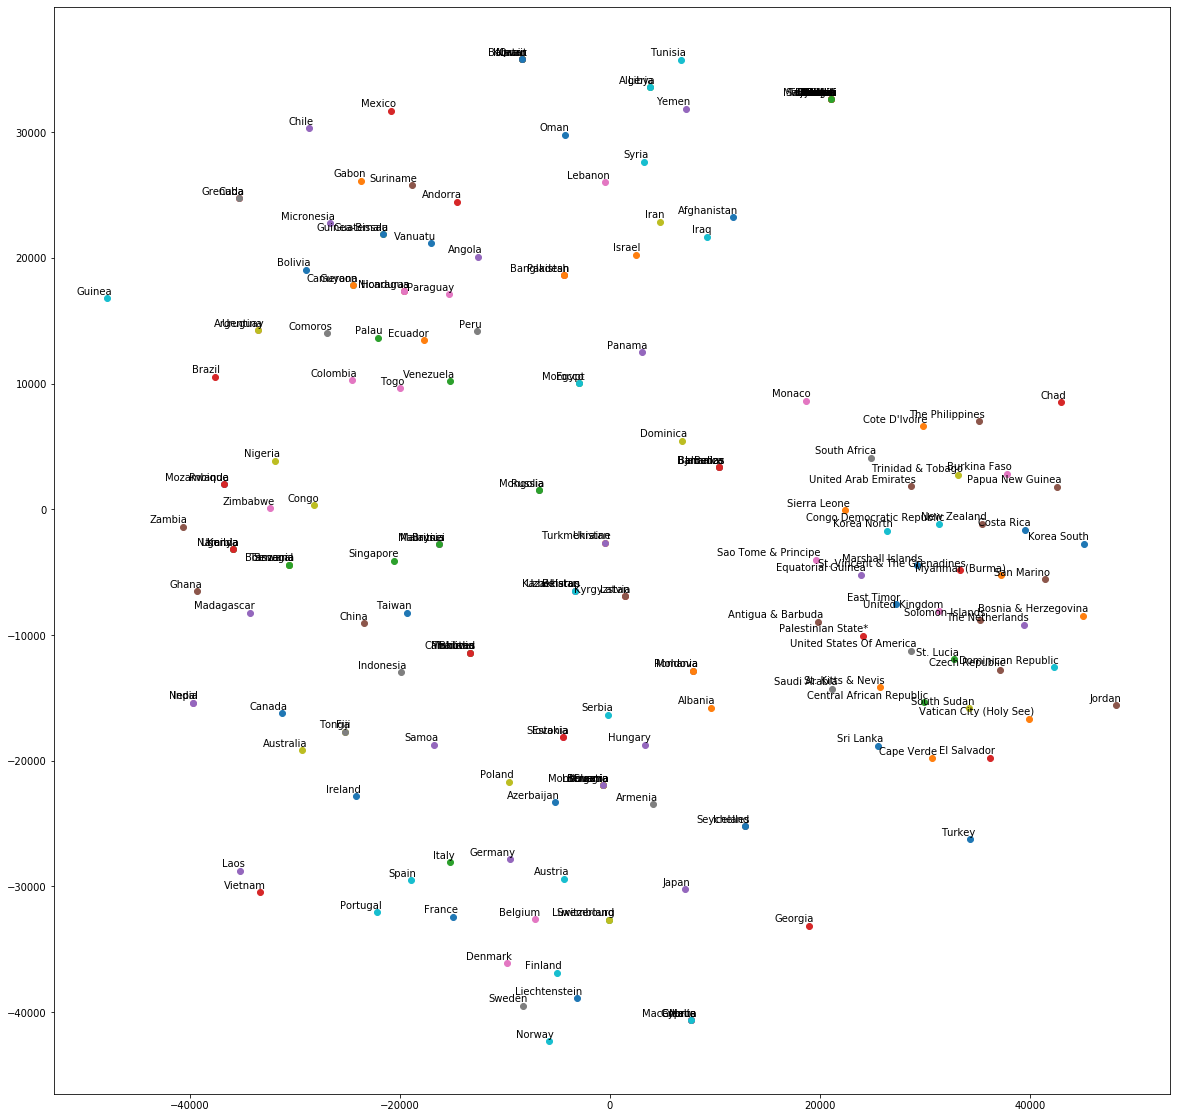

In [18]:
tsne_plot(model)

In [41]:
reset_dict['amazing'] 

[345.90890407562256, -792.4769401550293]

#### 5. Saving our new dictionary data to a json file

In [42]:
import json
with open('json_export/alice.json', 'w') as fp:
    json.dump(reset_dict, fp)

### We are done!